# NLP : Language Detection Project

# 0. Import Data Set from Hugging Face

In [3]:
import pandas as pd

In [4]:
#Import data train / val / test from Hugging Face
df_train=pd.read_csv('data/train.csv')
df_val=pd.read_csv('data/valid.csv')
df_test=pd.read_csv('data/test.csv')

In [5]:
#overview
df_train.head()

,labels,text
0,pt,"os chefes de defesa da estónia, letónia, lituâ..."
1,bg,размерът на хоризонталната мрежа може да бъде ...
2,zh,很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...
3,th,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...
4,ru,Он увеличил давление .


# 1. EDA

In [6]:
#Map labels
# Define the mapping dictionary
language_mapping = {
    'ar': 'Arabic',
    'bg': 'Bulgarian',
    'de': 'German',
    'el': 'Modern Greek',
    'en': 'English',
    'es': 'Spanish',
    'fr': 'French',
    'hi': 'Hindi',
    'it': 'Italian',
    'ja': 'Japanese',
    'nl': 'Dutch',
    'pl': 'Polish',
    'pt': 'Portuguese',
    'ru': 'Russian',
    'sw': 'Swahili',
    'th': 'Thai',
    'tr': 'Turkish',
    'ur': 'Urdu',
    'vi': 'Vietnamese',
    'zh': 'Chinese'
}

# Map the labels to language names
df_train['labels'] = df_train['labels'].map(language_mapping)
df_val['labels'] = df_val['labels'].map(language_mapping)
df_test['labels'] = df_test['labels'].map(language_mapping)

# Print the resulting DataFrame
df_train.head()

,labels,text
0,Portuguese,"os chefes de defesa da estónia, letónia, lituâ..."
1,Bulgarian,размерът на хоризонталната мрежа може да бъде ...
2,Chinese,很好，以前从不去评价，不知道浪费了多少积分，现在知道积分可以换钱，就要好好评价了，后来我就把...
3,Thai,สำหรับ ของเก่า ที่ จริงจัง ลอง honeychurch ...
4,Russian,Он увеличил давление .


In [7]:
#Any missing value in our data ?
print("train missing :\n", df_train.isna().sum())
print("\n")
print("val missing : \n",df_val.isna().sum())
print("\n")
print("test missing : \n",df_test.isna().sum())

train missing :
 labels    0
text      0
dtype: int64


val missing : 
 labels    0
text      0
dtype: int64


test missing : 
 labels    0
text      0
dtype: int64


## 1.1 Plot the distribution of language in every data set

In [8]:
import matplotlib.pyplot as plt

#count each language for each set
language_distribution_train = df_train['labels'].value_counts()
language_distribution_val = df_val['labels'].value_counts()
language_distribution_test = df_test['labels'].value_counts()

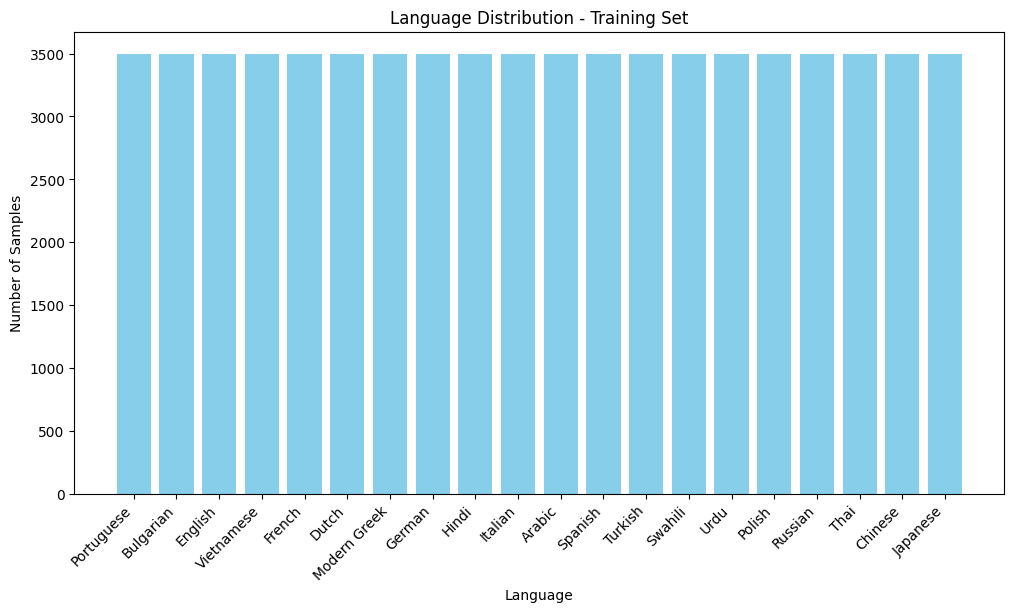

In [9]:
# Plotting the distribution for the training set
plt.figure(figsize=(12, 6))
plt.bar(language_distribution_train.index, language_distribution_train.values, color='skyblue')
plt.title('Language Distribution - Training Set')
plt.xlabel('Language')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.show()

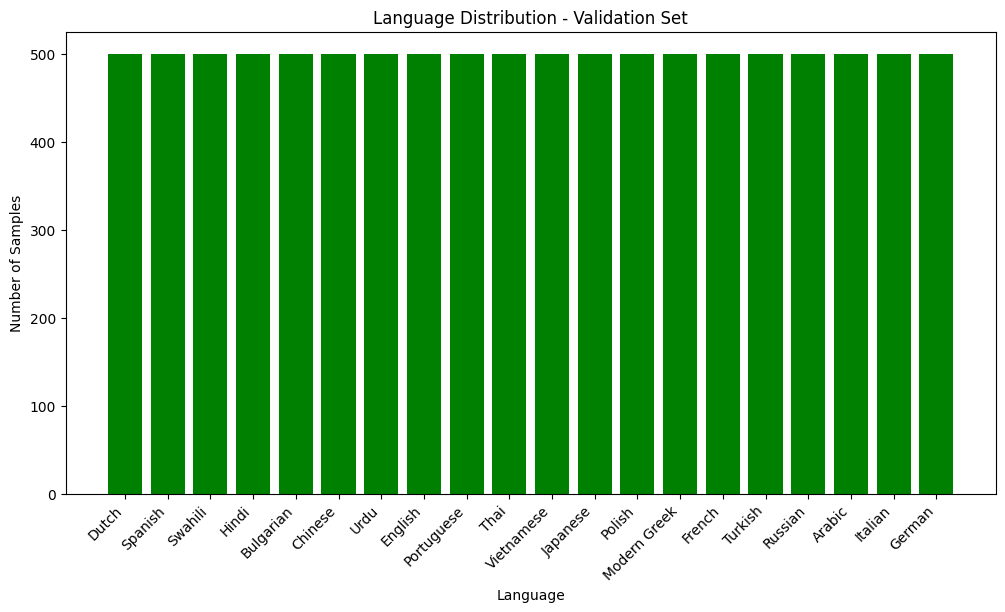

In [10]:
# Plotting the distribution for the validation set
plt.figure(figsize=(12, 6))
plt.bar(language_distribution_val.index, language_distribution_val.values, color='green')
plt.title('Language Distribution - Validation Set')
plt.xlabel('Language')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.show()


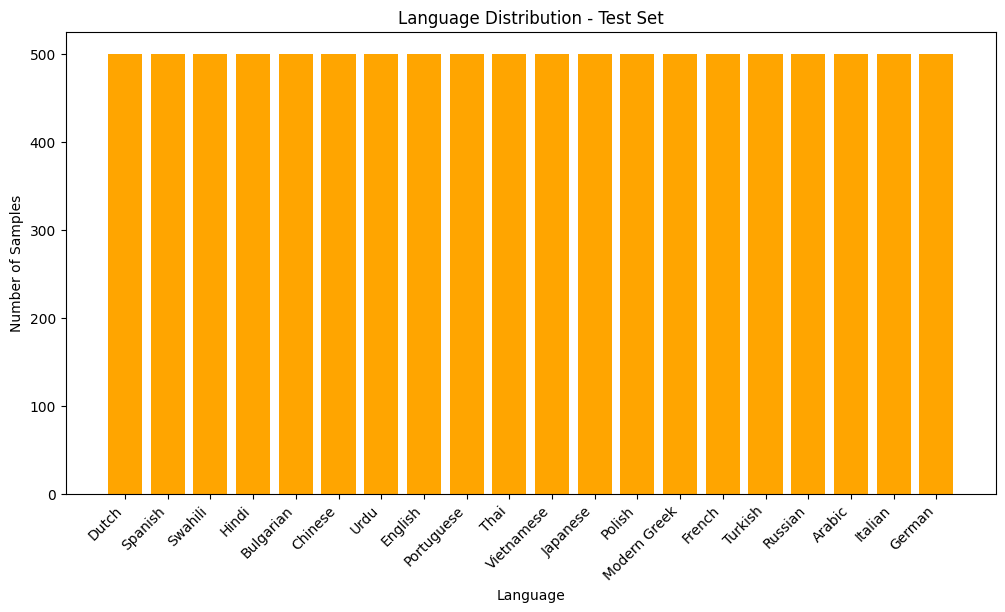

In [11]:
# Plotting the distribution for the test set
plt.figure(figsize=(12, 6))
plt.bar(language_distribution_test.index, language_distribution_test.values, color='orange')
plt.title('Language Distribution - Test Set')
plt.xlabel('Language')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.show()

## => Balanced data set : GOOD !

# 2. PRE PROCESSING

## 2.0 Split-clean-process

## 1. X features

In [12]:
#X (text)
X_train=df_train['text']
X_val=df_val['text']
X_test=df_test['text']

In [13]:
print('X_train shape', X_train.shape)
print('X_val shape', X_val.shape)
print('X_test shape', X_test.shape)

X_train shape (70000,)
X_val shape (10000,)
X_test shape (10000,)


## 2. y labels

In [14]:
#unique label (language)
print(df_train['labels'].unique())
print(df_val['labels'].unique())
print(df_test['labels'].unique())

['Portuguese' 'Bulgarian' 'Chinese' 'Thai' 'Russian' 'Polish' 'Urdu'
 'Swahili' 'Turkish' 'Spanish' 'Arabic' 'Italian' 'Hindi' 'German'
 'Modern Greek' 'Dutch' 'French' 'Vietnamese' 'English' 'Japanese']
['Dutch' 'Spanish' 'Italian' 'Arabic' 'Russian' 'Turkish' 'French'
 'Modern Greek' 'Polish' 'Japanese' 'Vietnamese' 'Thai' 'Portuguese'
 'English' 'Urdu' 'Chinese' 'Bulgarian' 'Hindi' 'Swahili' 'German']
['Dutch' 'Spanish' 'Italian' 'Arabic' 'Russian' 'Turkish' 'French'
 'Modern Greek' 'Polish' 'Japanese' 'Vietnamese' 'Thai' 'Portuguese'
 'English' 'Urdu' 'Chinese' 'Bulgarian' 'Hindi' 'Swahili' 'German']


In [15]:
#Split X_train - y_train from each data set 
y_train=df_train['labels']
y_val=df_val['labels']
y_test=df_test['labels']

In [16]:
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the labels in y_train
y_train_encoded = label_encoder.fit_transform(y_train).ravel()

# Transform the labels in y_val and y_test using the same encoder
y_val_encoded = label_encoder.transform(y_val).ravel()
y_test_encoded = label_encoder.transform(y_test).ravel()

In [17]:
#check length :
print(len(y_train_encoded))
print(len(y_val_encoded))
print(len(y_test_encoded))

70000
10000
10000


In [18]:
#check :
print(y_train_encoded)
print(y_val_encoded)
print(y_test_encoded)

[12  1  2 ... 18 14  7]
[ 3  3 14 ... 19  1 11]
[ 3  3 14 ... 19  1 11]


## 2.0 Clean Text

In [19]:
import re

def clean_text(text):
    # Lowercasing
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'\[', ' ', text)
    return text

In [20]:
# Applying the clean_text function to your DataFrame
X_train = X_train.apply(clean_text)
X_val = X_val.apply(clean_text)
X_test = X_test.apply(clean_text)

In [21]:
#Print some examples
unique_labels = df_train['labels'].unique()

for label in unique_labels:
    # Get one sentence for each unique label
    sample_sentence = df_train[df_train['labels'] == label]['text'].iloc[5]
    
    print(f"Language: {label}, Sample Sentence: {sample_sentence}")

Language: Portuguese, Sample Sentence: Ucrânia: Nove pessoas morrem em confrontos de Kyiv
Language: Bulgarian, Sample Sentence: в края на краищата това е само филм .
Language: Chinese, Sample Sentence: 裤子收到了，穿着很合适，款大不错，颜色也好看，很喜欢
Language: Thai, Sample Sentence: คุณ ไม่ต้อง แกล้ง ว่า คุณ ไม่ใช่
Language: Russian, Sample Sentence: У меня есть кое-что , что я не знаю , я даже не знаю , настоящие ли они , но они , кажется , очень старые греческие или римские монеты , которые кто-то подарил мне , когда я был ребенком . Никогда не делал ничего с ними , у меня все еще есть их в коробке .
Language: Polish, Sample Sentence: Czy on naprawdę potrafi zrobić mone z google reklamowego sensu.
Language: Urdu, Sample Sentence: کیونکہ آپ جانتے ہیں کہ ہر قسم کی مخصوص رپورٹس کے ساتھ ایک مسئلہ پیش آگیا اور اس طرح کی کم از کم ایک مسئلہ ہے اور جو کچھ اس کی وجہ سے ماضی کے بارے میں ہے ۔
Language: Swahili, Sample Sentence: Kwa mfano , shirika moja la masomo masomo shirika la masomo la miezi 3 ili retrain kuhusu

## 1. Bag-of-Words (BoW) :
Maintenant que vous avez prétraité vos données textuelles (X) et encodé vos labels (y), le prochain pas courant dans un projet de détection de la langue est de représenter vos données textuelles sous forme de caractéristiques numériques. Vous pouvez le faire à l'aide de techniques telles que la vectorisation de texte. Deux approches couramment utilisées sont la représentation en sac de mots (Bag-of-Words) et la représentation TF-IDF (Term Frequency-Inverse Document Frequency).

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Créez une instance de TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit et transformez le jeu de données d'entraînement
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformez les ensembles de validation et de test en utilisant le même vectoriseur
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [23]:
# Sauvegarder le vectoriseur dans un fichier pour application flask
joblib.dump(tfidf_vectorizer, 'model/TF-IDF.pkl')

['model/TF-IDF.pkl']

## 2. MODELISATION 
## Multinomial Naives Bayes Classifier (base model)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Add more values as needed
    'fit_prior': [True, False],
    # Add more hyperparameters and their possible values
}

# Create the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Create the GridSearchCV object
grid_search = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters found by the grid search
print("Best Parameters:", grid_search.best_params_)

# Get the best model from the grid search
best_nb_classifier = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_val_pred = best_nb_classifier.predict(X_val_tfidf)

# Display the classification report
report = classification_report(y_val, y_val_pred)
print(report)

# You can also access other information from the grid search, such as the best cross-validated score
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

Best Parameters: {'alpha': 0.1, 'fit_prior': True}
              precision    recall  f1-score   support

      Arabic       0.45      0.99      0.62       500
   Bulgarian       1.00      1.00      1.00       500
     Chinese       1.00      0.40      0.57       500
       Dutch       0.99      1.00      0.99       500
     English       0.96      1.00      0.98       500
      French       0.99      1.00      0.99       500
      German       0.99      1.00      1.00       500
       Hindi       1.00      0.95      0.97       500
     Italian       1.00      1.00      1.00       500
    Japanese       0.99      0.34      0.50       500
Modern Greek       1.00      1.00      1.00       500
      Polish       0.99      0.99      0.99       500
  Portuguese       0.99      1.00      0.99       500
     Russian       1.00      0.99      0.99       500
     Spanish       0.99      1.00      1.00       500
     Swahili       0.96      1.00      0.98       500
        Thai       1.00      0

# Evaluate model

In [25]:
#language class
language_classes = y_train.unique().tolist()

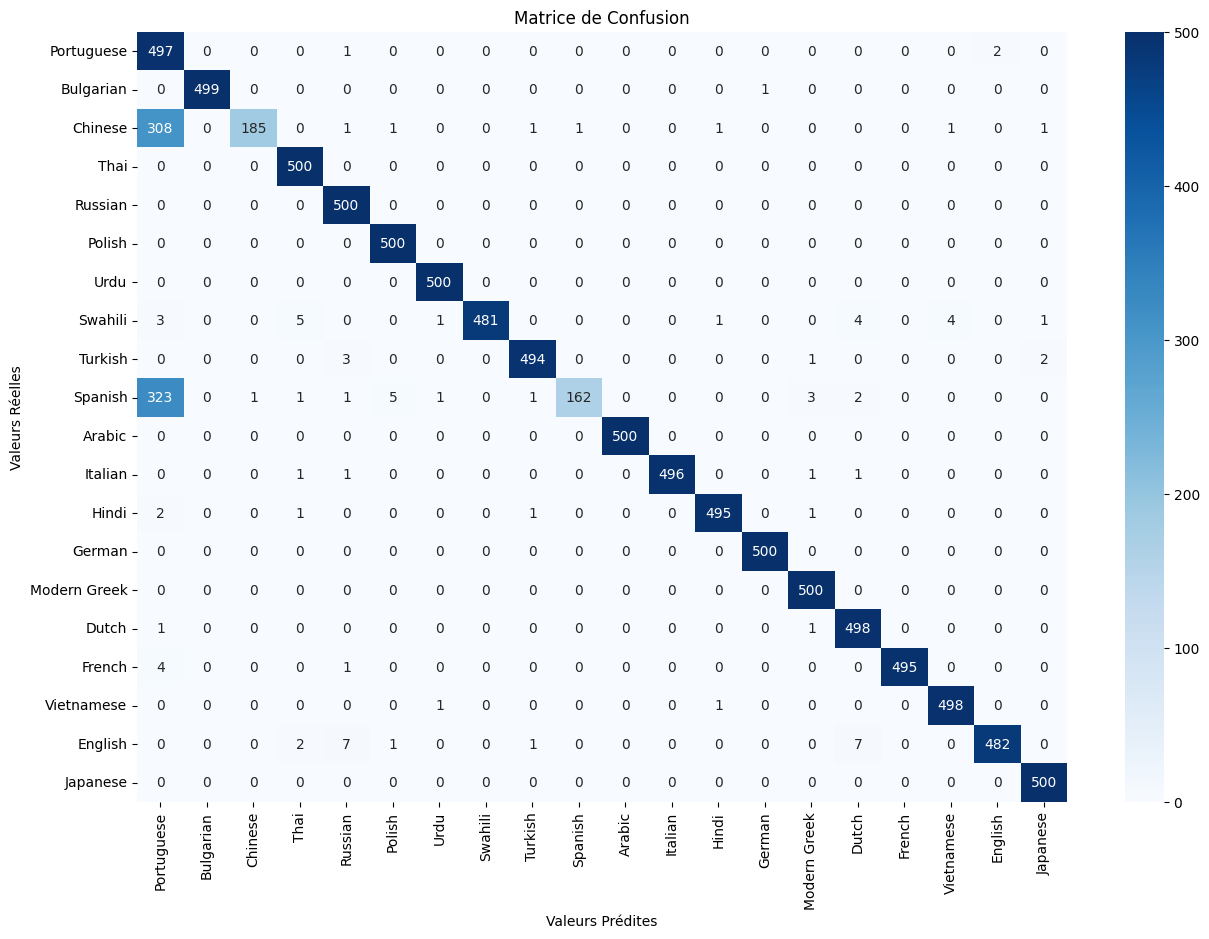

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Utiliser le même label encoder pour inverser la transformation
y_test_original = label_encoder.inverse_transform(y_test_encoded).ravel()

# Faire des prédictions sur l'ensemble de test
y_test_pred = best_nb_classifier.predict(X_test_tfidf)

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test_original, y_test_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=language_classes, yticklabels=language_classes)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

# SINGLE TEST PREDICTION

In [34]:
def predict_language(new_text):
    # Prétraiter le nouveau texte de la même manière que vos données d'entraînement
    cleaned_text = clean_text(new_text)

    # Vectoriser le texte avec le même vectoriseur BoW que celui utilisé lors de l'entraînement
    text_vectorized = tfidf_vectorizer.transform([cleaned_text])

    # Faire la prédiction avec le modèle entraîné
    predicted_language = best_nb_classifier.predict(text_vectorized)

    return predicted_language[0]

In [35]:
# Listes de textes de test pour chaque langue
test_texts = {
    'Arabic': 'مرحبًا بك في عالم البرمجة',
    'Bulgarian': 'Здравейте, свят!',
    'German': 'Hallo Welt!',
    'Modern Greek': 'Καλημέρα κόσμε!',
    'English': 'Hello, world!',
    'Spanish': '¡Hola mundo!',
    'French': 'Bonjour tout le monde !',
    'Hindi': 'नमस्ते दुनिया!',
    'Italian': 'Ciao mondo!',
    'Japanese': 'こんにちは、世界！',
    'Dutch': 'Hallo wereld!',
    'Polish': 'Witaj świecie!',
    'Portuguese': 'Olá mundo!',
    'Russian': 'Привет, мир!',
    'Swahili': 'Habari dunia!',
    'Thai': 'สวัสดี, โลก!',
    'Turkish': 'Merhaba dünya!',
    'Urdu': 'ہیلو دنیا!',
    'Vietnamese': 'Chào thế giới!',
    'Chinese': '你好，世界！'
}

In [36]:
# Tester le modèle pour chaque langue
Pos=0
Neg=0
for lang_name, text in test_texts.items():
    predicted_language = predict_language(text)
    print(f"Langue prédite pour {lang_name} : {predicted_language}")
    if lang_name==predicted_language:
        Pos=Pos+1
    else:
        Neg=Neg+1
print('\n')        
print("total positive guess :", Pos)
print("total negative guess :", Neg)
print("accuracy :" , (Pos/(Pos+Neg)))

Langue prédite pour Arabic : Arabic
Langue prédite pour Bulgarian : Bulgarian
Langue prédite pour German : German
Langue prédite pour Modern Greek : Arabic
Langue prédite pour English : English
Langue prédite pour Spanish : Portuguese
Langue prédite pour French : French
Langue prédite pour Hindi : Hindi
Langue prédite pour Italian : French
Langue prédite pour Japanese : Japanese
Langue prédite pour Dutch : Dutch
Langue prédite pour Polish : Polish
Langue prédite pour Portuguese : Portuguese
Langue prédite pour Russian : Russian
Langue prédite pour Swahili : Swahili
Langue prédite pour Thai : Thai
Langue prédite pour Turkish : Turkish
Langue prédite pour Urdu : Urdu
Langue prédite pour Vietnamese : Vietnamese
Langue prédite pour Chinese : Chinese


total positive guess : 17
total negative guess : 3
accuracy : 0.85


In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

true_labels = list(test_texts.keys())
predicted_labels = [predict_language(text) for text in test_texts.values()]

accuracy = accuracy_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels, average='weighted')  # utilisez 'weighted' si les classes ne sont pas équilibrées
precision = precision_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.85
Recall: 0.85
Precision: 0.775
F1 Score: 0.8


c:\Users\Gatsu\anaconda3\envs\tensorflow2.10_gpu_env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3. SAVE MODEL

In [38]:
# Save the best_nb_classifier model to a file
joblib.dump(best_nb_classifier, 'model/LanguageDetection.joblib')

# Now, you can load the model back using the following code
# loaded_model = joblib.load('best_nb_classifier_model.joblib')

['model/LanguageDetection.joblib']